# Stellar Wakes: Plummer likelihood example

In this example, we will use example stellar kinematic data in the `examples/data/` folder to illustrate how to use the Plummer likelihood function

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True

from stellarWakes import LL
from stellarWakes import Asimov

## Load data

First, we load in the kinematic data.

In [2]:
null_data =  np.loadtxt("data/null_data_chunk0.txt")  
subhalo_data = np.loadtxt("data/subhalo_data_chunk0.txt")
for i in [1, 2, 3]:
    null_data    = np.append( null_data,    np.loadtxt("data/null_data_chunk"+str(i)+".txt"), axis=0 )
    subhalo_data = np.append( subhalo_data, np.loadtxt("data/subhalo_data_chunk"+str(i)+".txt"), axis=0 )

The datasets above are constructed from a background distribution of stars within an ROI with the following properties:
1.  ROI radius R = 3.0 kpc
2.  Background velocity distribution a Maxwell-Boltzmann distribution with $v_0 = 100$ km/s.
3.  Stellar number density $n_0 = 5\times 10^3$ kpc$^{-3}$

**Null Data**
1.  No subhalo present

**Subhalo data**
1.  Subhalo currently at the origin x,y,z = 0,0,0 kpc.
2.  Subhalo velocity ${\bf v} = 200 \, \text{km/sec} \, {\bf \hat x}$

**Data format**

The data is a list of kinematic data, of the form $[x,y,z,v_x,v_y,v_z]$.  All positions are in kpc and velocities in km/sec.



## Construct likelihood profiles as functions of $M_\text{sh}$

Now we will use the `stellarWakes.LL` package to construct likelihood profiles as function $M_\text{sh}$

In [3]:
# Fixed model parameters
R = 3.0 #ROI radius in kpc
ns = 5e3 #number density normalization parameter in kpc^{-3}
v0 = 100 # velocity dispersion parameter of Maxwell-Boltzmann of background phase-space in km/s
sub_halo_phase = np.array([0.0,0.0,0.0,200.0,0.0,0.0]) #sub-halo phase-space point [x,y,z,vx,vy,vz] in kpc and km/s

In [4]:
def return_rs(M_sh):
    '''Return the expected Plummer radius rs in kpc for subhalo mass M_sh in solar masses'''
    rs = 1.62*(M_sh/10**8)**0.5
    return rs

In [5]:
##Make an array of Masses
Msh_list = 10**np.linspace(5,8,50) #Mass list in solar masses
rs_list = return_rs(Msh_list) #Plummer radius list in kpc

LL_array_null = np.zeros(len(Msh_list)) #List for log-likelihood values for data without subhalo
LL_array_subhalo = np.zeros(len(Msh_list)) #List for log-likelihood values for data with subhalo
for i in range(len(Msh_list)): #iterate through list and fill in log-likelihood values
    LL_array_null[i] = LL.Plummer(null_data,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)
    LL_array_subhalo[i] = LL.Plummer(subhalo_data,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)

## Perform Asimov test

In [6]:
TS_arr = np.zeros(len(Msh_list))

for i in range(len(Msh_list)):
    TS_arr[i] = Asimov.TS_Asimov(R,ns,v0,Msh_list[i],sub_halo_phase,rs_list[i])

## Plot the likelihood profiles

(-15, 15)

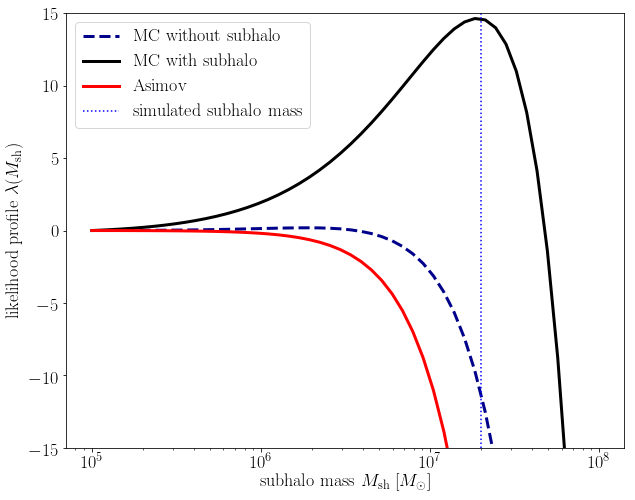

In [7]:
fig = plt.figure(figsize=(10,8))

plt.plot(Msh_list,2*(LL_array_null-LL_array_null[0]),"k--",label="MC without subhalo",color='darkblue',linewidth=3.0 )
plt.plot(Msh_list,2*(LL_array_subhalo-LL_array_subhalo[0]),"k-",label = "MC with subhalo",linewidth=3.0 )
plt.plot(Msh_list,2*(TS_arr-TS_arr[0]),"k-",label = "Asimov",color='red',linewidth=3.0 )
plt.axvline(2e7,color="blue",linestyle="dotted",label="simulated subhalo mass")

plt.xscale('log')
plt.legend(fontsize=18)
plt.xlabel(r'subhalo mass $M_{\mathrm{sh}}$ [$M_\odot$]',fontsize=18)
plt.ylabel(r'likelihood profile $\lambda(M_\mathrm{sh})$',fontsize=18) #{\mathcal{L}}

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.ylim([-15,15])